In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# À prendre ou à laisser
ap_ou_al = pd.DataFrame({"winnings": [0, 5, 10, 20, 50, 100, 500, 1000, 500_000],
                      "tickets": [np.nan, 1_500_000, 1_500_000, 108_000, 116_000, 1_000, 140, 95, 2]})
ap_ou_al

,winnings,tickets
0,0,NaN
1,5,1500000.0
2,10,1500000.0
3,20,108000.0
4,50,116000.0
5,100,1000.0
6,500,140.0
7,1000,95.0
8,500000,2.0


In [16]:
ticket_price = 5
ap_ou_al.insert(1, "net_winnings", ap_ou_al.winnings - ticket_price)
ap_ou_al


,winnings,net_winnings,tickets
0,0,-5,NaN
1,5,0,1500000.0
2,10,5,1500000.0
3,20,15,108000.0
4,50,45,116000.0
5,100,95,1000.0
6,500,495,140.0
7,1000,995,95.0
8,500000,499995,2.0


In [17]:
total_tickets = 9_000_000
winning_tickets = int(ap_ou_al.tickets.sum())
winning_tickets

ap_ou_al.loc[0, "tickets"] = total_tickets - winning_tickets
ap_ou_al.tickets = ap_ou_al['tickets'].astype('int')

ap_ou_al["ticket_percentage"] = ap_ou_al.tickets / total_tickets * 100
ap_ou_al

,winnings,net_winnings,tickets,ticket_percentage
0,0,-5,5774763,64.164033
1,5,0,1500000,16.666667
2,10,5,1500000,16.666667
3,20,15,108000,1.200000
4,50,45,116000,1.288889
5,100,95,1000,0.011111
6,500,495,140,0.001556
7,1000,995,95,0.001056
8,500000,499995,2,0.000022


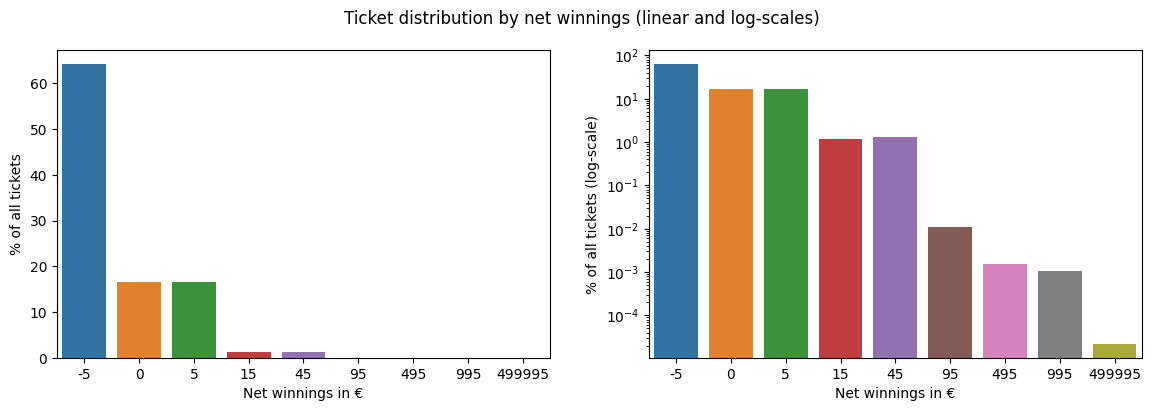

In [18]:
plt.figure(figsize=(14, 4))

ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=ap_ou_al, x="net_winnings", y="ticket_percentage")
ax1.set_xlabel("Net winnings in €")
ax1.set_ylabel("% of all tickets")

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=ap_ou_al, x="net_winnings", y="ticket_percentage")
ax2.set_xlabel("Net winnings in €")
ax2.set_ylabel("% of all tickets (log-scale)")
ax2.set_yscale("log")

plt.suptitle("Ticket distribution by net winnings (linear and log-scales)")
plt.show()

In [19]:
ap_ou_al["total_net_winnings"] = ap_ou_al.net_winnings * ap_ou_al.tickets
ap_ou_al

,winnings,net_winnings,tickets,ticket_percentage,total_net_winnings
0,0,-5,5774763,64.164033,-28873815
1,5,0,1500000,16.666667,0
2,10,5,1500000,16.666667,7500000
3,20,15,108000,1.200000,1620000
4,50,45,116000,1.288889,5220000
5,100,95,1000,0.011111,95000
6,500,495,140,0.001556,69300
7,1000,995,95,0.001056,94525
8,500000,499995,2,0.000022,999990


In [20]:
ap_ou_al[["tickets", "ticket_percentage", "total_net_winnings"]].sum().astype('int')

tickets                9000000
ticket_percentage          100
total_net_winnings   -13275000
dtype: int64

In [24]:
average_ticket_net_winnings = ap_ou_al["total_net_winnings"].sum() / total_tickets
percentage = -average_ticket_net_winnings / ticket_price
print(average_ticket_net_winnings, f"€, soit {percentage:.2%} du prix du ticket est perdu en moyenne")

-1.475 €, soit 29.50% du prix du ticket est perdu 


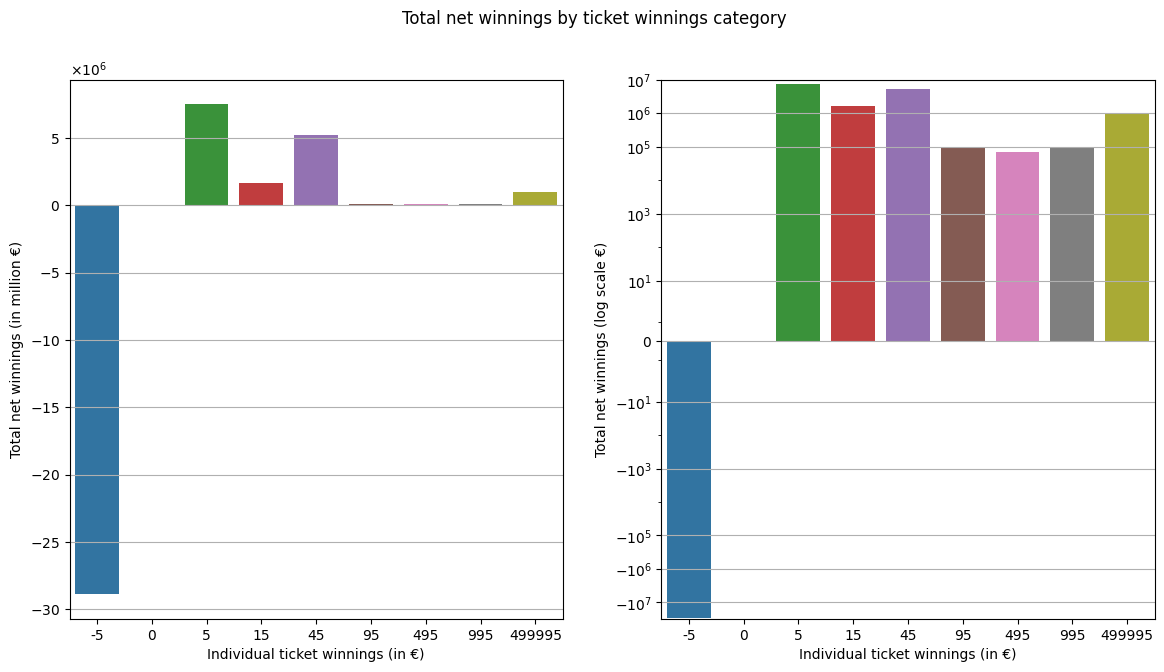

In [23]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(14, 7))
plt.suptitle("Total net winnings by ticket winnings category")

ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=ap_ou_al, x="net_winnings", y="total_net_winnings")
plt.xlabel("Individual ticket winnings (in €)")
plt.ylabel("Total net winnings (in million €)")

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((6, 6))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, axis="y")

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=ap_ou_al, x="net_winnings", y="total_net_winnings")
plt.xlabel("Individual ticket winnings (in €)")
plt.ylabel("Total net winnings (log scale €)")
plt.yscale("symlog")
plt.yticks([-10000000, -1000000, -100000, -1000, -10, 0, 10, 1000, 100000, 1000000, 10000000])
plt.grid(True, axis="y")

plt.show()
